<center>
<img src="logo.png" height="900"> 
</center>


#  Акции

В этом задании мы немного поработаем с ценами на акции. 

In [1]:
import numpy as np
import pandas as pd

import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

В табличке `prices.tsv` лежат данные о том как менялась цена на акции из индексов [S&P-500](https://ru.wikipedia.org/wiki/S%26P_500), [NASDAQ-100](https://ru.wikipedia.org/wiki/Nasdaq-100) и [DJI](https://ru.wikipedia.org/wiki/Промышленный_индекс_Доу_—_Джонса) в течение последних $10$ лет. В табличке `information.tsv` лежит дополнительная полезная информация по каждой из ценных бумаг.  Подгрузим эти таблицы и посмотрим на них. 

In [2]:
df_prices = pd.read_csv('price.tsv', sep='\t')

# сделали дату индексом таблицы и применили это преобразование
df_prices.set_index('Date', inplace=True)  
df_prices


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-02,18.982769,10.030768,51.945328,32.324974,NaN,26.103115,11.170000,17.431229,32.489162,29.600000,...,43.086357,28.942909,21.664534,NaN,24.980757,49.945686,27.590000,20.329309,NaN,NaN
2010-08-03,18.337280,10.049624,51.148121,32.334858,NaN,25.590956,10.970000,17.490696,32.223312,29.120001,...,43.628933,29.177372,21.289482,NaN,24.594522,50.279709,27.400000,20.080635,NaN,NaN
2010-08-04,18.633682,9.455699,51.877274,32.464500,NaN,25.915325,10.500000,17.553665,32.497211,29.700001,...,43.628933,29.674450,21.488039,NaN,24.808437,50.873531,28.090000,20.089518,NaN,NaN
2010-08-05,18.745655,9.088029,52.373096,32.306469,NaN,25.898251,10.260000,17.483702,32.199158,29.440001,...,43.621983,29.590042,21.267420,NaN,25.200619,50.567337,30.350000,19.636568,NaN,NaN
2010-08-06,18.923494,8.946616,51.284237,32.107712,NaN,25.812889,9.980000,17.690086,32.440819,29.230000,...,43.107220,29.599421,21.157112,NaN,25.170906,50.084862,30.240000,19.227848,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,97.269997,11.390000,146.830002,378.557434,97.160004,103.574806,298.609985,99.989998,223.320007,437.100006,...,43.217411,43.450001,15.820000,75.260002,93.370003,134.240005,273.339996,32.098629,252.330002,146.919998
2020-07-28,95.300003,11.770000,146.190002,372.338684,96.709999,101.692535,294.890015,99.860001,222.179993,432.260010,...,42.707470,43.500000,15.210000,74.339996,92.750000,134.160004,271.179993,31.950068,252.179993,145.979996
2020-07-29,97.099998,11.400000,148.210007,379.475800,97.010002,102.887627,299.100006,102.519997,224.380005,436.299988,...,43.178185,44.790001,15.860000,77.169998,94.830002,139.580002,273.850006,33.049404,252.389999,147.589996


In [3]:
df_inf = pd.read_csv('information.tsv', sep='\t')
df_inf

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded,S&P-500,NASDAQ,DJI
0,A,Agilent Technologies Inc,reports,Health Care,Health Care Equipment,"Santa Clara, California",05.06.00,1090872.0,1999.0,True,False,False
1,AAL,American Airlines Group,reports,Industrials,Airlines,"Fort Worth, Texas",23.03.15,6201.0,1934.0,True,False,False
2,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",09.07.15,1158449.0,1932.0,True,False,False
3,AAPL,Apple Inc.,reports,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",30.11.82,320193.0,1977.0,True,True,True
4,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31.12.12,1551152.0,1888.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
520,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",07.08.01,1136869.0,1927.0,True,False,False
521,ZBRA,Zebra Technologies,reports,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",23.12.19,877212.0,1969.0,True,False,False
522,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",22.06.01,109380.0,1873.0,True,False,False
523,ZM,Zoom Video Communications,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False


> Давайте решим пробную задачку, чтобы вы понимали, как устроена система тестирования. 

В колонках `'S&P-500', 'NASDAQ', 'DJI'` лежит True, если ценная бумага входит в соотвествующий индекс. Сколько ценных бумаг из таблицы входили в индекс NASDAQ? Запишите результат в пременную `n_nasdaq`.

In [4]:
n_nasdaq = df_inf['NASDAQ'].sum() # каждое True это 1, а False 0


103

Все ваши расчёты будут тестироваться с помощью вот таких тестов. 

In [5]:
assert n_nasdaq == 103

Мы положили в переменную `n_nasdaq` число ценных бумаг, как и требовалось в задании. Тесты прошли и всё успешно отработало. Подобные тесты сделаны по каждому заданию, но скрыты от вас. Вы довольно часто будете видеть ячейки с комментарием: 

In [6]:
# проверка, что задание решено корректно

Он означает, что внутри этой ячейки есть секретные тесты, которые сами запустятся, когда нажмёте на кнопку __Submit assignment.__

__а)__ Теперь настоящее задание. Сколько ценных бумаг входят во все три индекса сразу?

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 7
n_sp=(df_inf['NASDAQ']&df_inf['S&P-500']&df_inf['DJI']).sum()
n_sp


# your code here


5

In [8]:
# проверка, что задание решено корректно
assert n_sp < 10

# Подобные тесты скрыты от вас

__б)__ В колонке `Founded` записан год основания компании. Сколько компаний из индекса S&P-500 были основаны в 19 веке (1900 год относится к 20 веку)? 

In [46]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 91
datte=df_inf[df_inf.Founded<1900]
datte=datte[datte.Founded>1800]
n_founded = datte['S&P-500'].sum()
n_founded



95

In [47]:
# проверка, что задание решено корректно
assert n_founded < 100
assert n_founded > 90

# Подобные тесты скрыты от вас

__в)__  В колонке `GICS Sector` находится сектор экономики, в котором работает компания. Сколько всего уникальных секторов представлено в данных? Все пропуски в этой колонке удалите методом `.dropna()`. 

In [78]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 10
n_sectors=df_inf['GICS Sector'].dropna().unique().size
#df_inf['GICS Sector'].unique( )
#n_sectors = df_inf['GICS Sector'].unique().size
#df_inf['GICS Sector'].dropna()
#n_sectors=11



# your code here


In [79]:
# проверка, что задание решено корректно
assert n_sectors > 5
assert n_sectors < 15

# Подобные тесты скрыты от вас

__г)__ Сколько компаний из индекса S&P-500 в сумме приходится на $3$ самых крупных сектора? 

In [13]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 205
x=df_inf[df_inf["S&P-500"]>0]["GICS Sector"]
n_top3=x.value_counts()[:3].sum()


#n_top3  = ... # запишите результат в переменную n_top3

# your code here


In [14]:
# проверка, что задание решено корректно
assert n_top3 < 300
assert n_top3 > 200

# Подобные тесты скрыты от вас

__д)__ У скольки компаний тикер (краткое название из колонки `Symbol`) состоит из трёх букв? 

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 3
x=df_inf['Symbol'].apply(len)
n_ticker=len(x[x==3])
n_ticker


        

#n_ticker  = ... # запишите результат в переменную n_ticker

# your code here


308

In [16]:
# проверка, что задание решено корректно
assert n_ticker > 300
assert n_ticker < 400

# Подобные тесты скрыты от вас

А из другого количества букв? Заведите колонку `letter_count` с числом букв в тикере, а после подсчитайте как часто в ней встречаются разные значения. 

In [17]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
df_inf['letter_count']=df_inf['Symbol'].apply(len)
df_inf['letter_count'].value_counts()
# your code here


3    308
4    148
2     52
1     10
5      7
Name: letter_count, dtype: int64

Создайте в таблице новую колонку `first_letter`. Запишите туда первую букву каждого тикера из колонки `Symbol`. Какая буква встречается на первом месте чаще всего? 

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
def letter1(name):
    return name[0]
    
# Формат ответа: строка, пример: 'B'
df_inf['first_letter']=df_inf['Symbol'].apply(letter1)
df_inf['first_letter'].value_counts().index[0]
popular_letter = df_inf['first_letter'].value_counts().index[0]# запишите результат в переменную popular_letter
popular_letter




'A'

In [19]:
# проверка, что задание решено корректно
assert popular_letter not in {'T', 'C', 'M', 'P', 'D'}

# Подобные тесты скрыты от вас

__е)__ Теперь поработаем со стоимостью акций. 

- Из таблицы `df_inf` возьмите колонку `Symbol` и сохраните значения из неё, `.values`, в вектор tickers
- Выберите из вектора 10 случайных тикеров командой `np.random.choice`, опцию `replace` установить в `False`, нам нужна выборка без повторений

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: целое число, пример: 505
tickers = df_inf.Symbol.values
# Формат ответа: массив из тикеров, пример: ['TSLA', 'AAPL', 'GOOG']
tickers10 = np.random.choice(tickers,10,replace=False)
# your code here


In [41]:
# проверка, что задание решено корректно
assert tickers.size > 500
assert tickers.size < 550

# Подобные тесты скрыты от вас

Методом `.plot` постройте для выбранных 10 тикеров картинку с динамикой их цен. В скобках у `.plot()` допишите `figsize=(12,7)`, чтобы отрегулировать размер картинки.

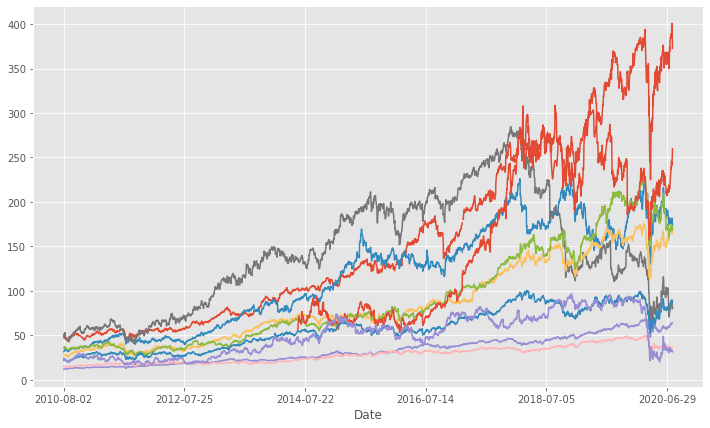

In [22]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
# your code here
#df_prices.OXY.values
for i in range(10):
    df_prices[tickers10[i]].plot(figsize=(12,7))


Методом `.hist()` постройте для этих цен гистограммы. Выберите количество бинов `bins` равное $25$, опцию `density` поставьте в `True`. Это отнормирует высоту столбиков так, чтобы сумма площадей под ними была равна единице. 

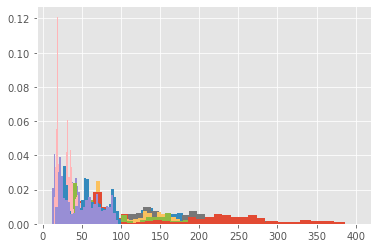

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
for i in range(10):
    df_prices[tickers10[i]].hist(bins=25,density=True)
# your code here


- Как скорее всего распределена стоимость акций?
- Что происходило с финансовыми рынками в течение последних $10$ лет? Они росли? Они падали? Видно ли, что были кризисы? 

Финансовые продукты характеризуются двумя основными характеристикам – __доходностью__ и __риском.__ Доходность – это процентное изменение стоимости за некоторый промежуток времени. Мы будем работать с доходностями за день: 

$$
R_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Перейдите к доходностям для всей таблицы `df_prices`. Для того, чтобы посчитать разность между каждой строкой таблицы и предыдущей строкой, используйте команду `.diff()`. Чтобы сдвинуть все строки на одну вниз, используйте команду `shift(1)`.  

Поделите результат работы команды `diff` на результат работы команды `shift`. Обратите внимание, что в первой колонке теперь все значения `NaN`, так как мы не можем посчитать доходность для самого первого дня. Удалите из таблицы эту строку. 

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_r = (df_prices.diff()/df_prices.shift(1)) # запишите сюда новую таблицу
df_r=df_r.drop('2010-08-02')
df_r
# your code here


,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZM,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2010-08-03,-0.034004,0.001880,-0.015347,0.000306,NaN,-0.019621,-0.017905,0.003412,-0.008183,-0.016216,...,0.012593,0.008101,-0.017312,NaN,-0.015461,0.006688,-0.006887,-0.012232,NaN,NaN
2010-08-04,0.016164,-0.059099,0.014256,0.004009,NaN,0.012675,-0.042844,0.003600,0.008500,0.019918,...,0.000000,0.017036,0.009327,NaN,0.008698,0.011810,0.025183,0.000442,NaN,NaN
2010-08-05,0.006009,-0.038883,0.009558,-0.004868,NaN,-0.000659,-0.022857,-0.003986,-0.009172,-0.008754,...,-0.000159,-0.002844,-0.010267,NaN,0.015808,-0.006019,0.080456,-0.022547,NaN,NaN
2010-08-06,0.009487,-0.015560,-0.020790,-0.006152,NaN,-0.003296,-0.027291,0.011804,0.007505,-0.007133,...,-0.011801,0.000317,-0.005187,NaN,-0.001179,-0.009541,-0.003624,-0.020814,NaN,NaN
2010-08-09,0.037940,0.025290,0.009668,0.006382,NaN,-0.006283,0.025050,0.006130,0.007450,0.009921,...,0.007746,0.006654,0.016684,NaN,0.007790,0.000186,0.006614,0.009242,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-27,0.025947,0.000000,-0.002988,0.023700,0.000515,0.002313,0.019355,0.010510,0.008490,0.015779,...,0.014736,0.004857,0.010863,0.013603,0.002469,0.000969,0.012445,-0.036277,0.023402,0.018721
2020-07-28,-0.020253,0.033363,-0.004359,-0.016427,-0.004632,-0.018173,-0.012458,-0.001300,-0.005105,-0.011073,...,-0.011799,0.001151,-0.038559,-0.012224,-0.006640,-0.000596,-0.007902,-0.004628,-0.000594,-0.006398
2020-07-29,0.018888,-0.031436,0.013818,0.019168,0.003102,0.011752,0.014276,0.026637,0.009902,0.009346,...,0.011022,0.029655,0.042735,0.038068,0.022426,0.040400,0.009846,0.034408,0.000833,0.011029


In [25]:
# проверка, что задание решено корректно
assert df_r.iloc[0,0] < 1

# Подобные тесты скрыты от вас

Методом `.plot` постройте для выбранных ранее 10  случайных тикеров картинку с динамикой доходностей. 

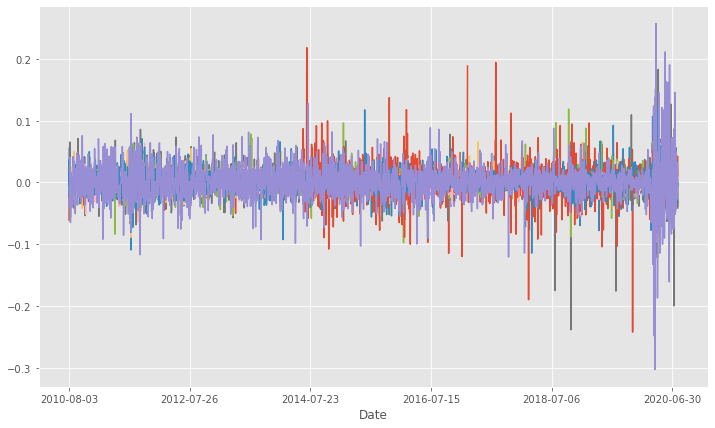

In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
for i in range(10):
    df_r[tickers10[i]].plot(figsize=(12,7))
# your code here


Постройте для доходностей этих десяти тикеров гистограммы. 

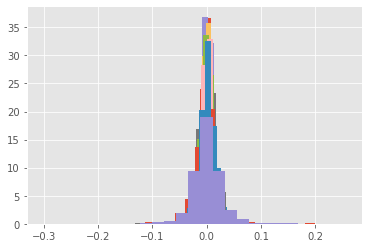

In [27]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
for i in range(10):
    df_r[tickers10[i]].hist(bins=25,density=True)
# your code here


Постройте для доходностей этих 10 бумаг ящики с усами. Для этого в опциях команды `plot` укажите `'kind'='box'`. 

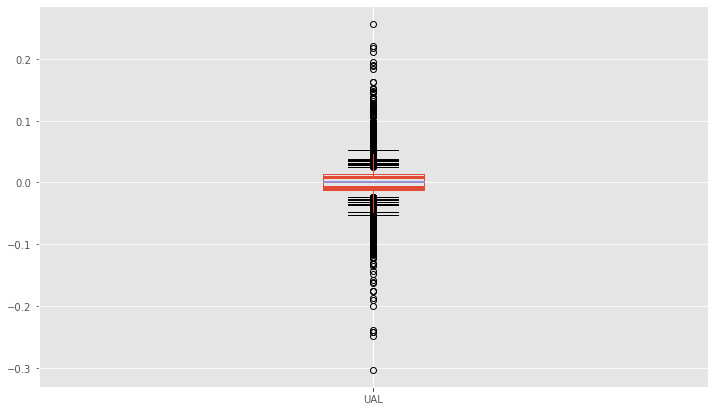

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
for i in range(10):
    df_r[tickers10[i]].plot(kind='box',figsize=(12,7))
# your code here


__Выводы:__ 

Доходности по нашим акциям имеют распределение похожее на нормальное, но есть отличие. По ящикам с усами видно, что в данных есть довольно большое количество выбросов. Это сигнализирует о том, что у распределения доходностей хвосты оказываются более тяжёлыми, чем у нормального распределения. То есть под ними сосредоточено больше вероятностной массы и из-за этого редкое события более вероятны, чем для нормального распределения. Такую особенность финансовых данных мы более подробно будем обсуждать в будущем. 

Кроме того, по построенным визуализациям видно, что средние доходности практически для всех ценных бумаг находится близко к нулю.

__ё)__  Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

Посчитайте для всех компаний среднюю доходность (просто сделайте `.mean()` за весь период). Найдите 10 самых доходных компаний и 10 самых убыточных. 

In [29]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

R  = df_r.mean()
 # средние доходности 
# Формат ответа: массивы из 10 тикеров, отсортированных в ликсикографическом порядке 
# пример: ['CARR', 'DOCU', 'DXCM', 'HWM']
# тип данных должен быть list, не np.array
# метод .values выдаёт данные в формате np.array: array(['CARR', 'DOCU', 'DXCM', 'HWM'])
rtop_10 =R.sort_values(ascending=False)[:10].sort_index( ).index.tolist()
# list из тикеров 10 самых доходных компаний отсортированный по алфавиту
rbottom_10 =  R.sort_values(ascending=True)[:10].sort_index( ).index.tolist()  # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту
# your code here


In [30]:
# проверка, что задание решено корректно
assert 'DXCM' in rtop_10
assert 'HWM' in rtop_10

assert 'SLB' in rbottom_10
assert 'FOX' in rbottom_10

# Подобные тесты скрыты от вас

Есть ли среди самых доходных компаний Тесла? :) 

__ж)__ Мы поговорили о доходности. Теперь поговорим о риске. Один из способов измерить, насколько ценная бумага рискованная -  использовать стандартное отклонение. 

Посчитайте для всех компаний стандартное отклонение доходности. Найдите 10 самых рискованных компаний и 10 самых безрисковых. 

In [31]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

STD  = df_r.std()  

# стандартные отклонения доходностей

# Формат ответа: массивы из 10 тикеров, отсортированных в ликсикографическом порядке 
# пример: ['CARR', 'DOCU', 'DXCM', 'HWM']
# тип данных должен быть list, не np.array
# метод .values выдаёт данные в формате np.array: array(['CARR', 'DOCU', 'DXCM', 'HWM'])
stdtop_10 = STD.sort_values( ascending=False)[:10].sort_index().index.tolist()

# list из тикеров 10 самых доходных компаний отсортированный по алфавиту
stdbottom_10 = STD.sort_values(ascending=True)[:10].sort_index().index.tolist() # list из тикеров 10 самых убыточных компаний отсортированный по алфавиту
# your code here


In [32]:
# проверка, что задание решено корректно
assert 'TSLA' in stdtop_10
assert 'HWM' in stdtop_10

assert 'PEP' in stdbottom_10
assert 'DUK' in stdbottom_10

# Подобные тесты скрыты от вас

Есть ли среди самых рискованных компаний Тесла? :) 

Обычно инвесторы принимают решение покупать бумагу к себе в портфель, отталкиваясь от того какие соотношения доходность/риск существуют на рынке. Построим для наших ценных бумаг диаграмму рассеивания, на которой будет видно где по своей доходности и риску находится какая ценная бумага. 

Если вы корректно решили все предыдущие пункты, вам достаточно просто запустить код ниже и он выполнится сам. 

In [33]:
# таблица с доходностями и риском
data = pd.DataFrame({'std': STD, 'r': R})

# добавили сектора экономики для каждой из ценных бумаг
data = data.join(df_inf.set_index('Symbol')['GICS Sector'])
data.fillna('another sector')
data.head()

,std,r,GICS Sector
A,0.018245,0.000808,Health Care
AAL,0.032635,0.000549,Industrials
AAP,0.020001,0.000585,Consumer Discretionary
AAPL,0.017418,0.001179,Information Technology
ABBV,0.018026,0.000873,Health Care


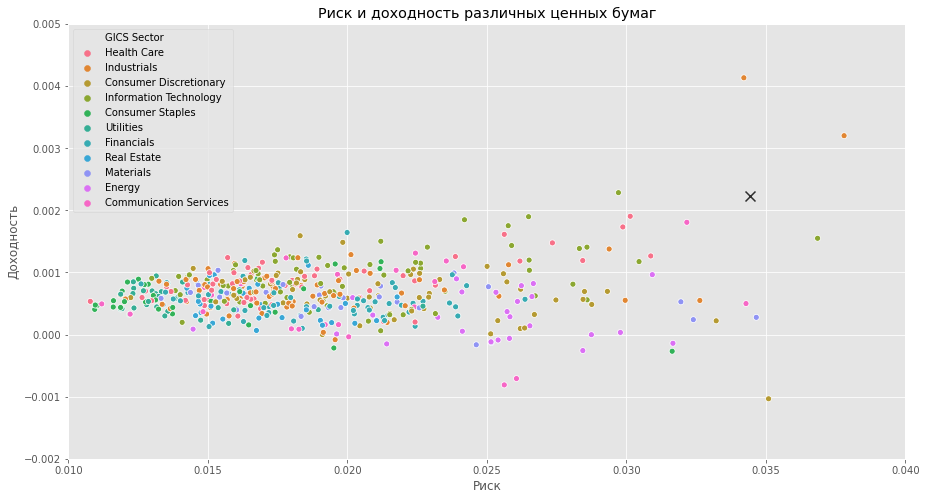

In [34]:
plt.figure(figsize=(15, 8))

sns.scatterplot(data=data, x='std', y='r', hue='GICS Sector')

tsla = data.loc['TSLA']
sns.regplot([tsla['std']], [tsla['r']], scatter=True, fit_reg=False, 
            marker='x', color='black', scatter_kws={'s':100}) 

plt.ylim(-0.002, 0.005)
plt.xlim(0.01, 0.04)

plt.xlabel('Риск')
plt.ylabel('Доходность')
plt.title('Риск и доходность различных ценных бумаг');

Чем больше риск, тем выше потенциально может оказаться доходноcть. __Но при этом мы с более высокой вероятностью можем уйти в убыток.__ Чёрным крестиком отдельно отмечена Тесла, которая обладает довольно высокими доходностью и риском.

> Можно ли купить какую-то другую бумагу, которая обладает примерно такой же доходностью как тесла, но при этом её риск меньше? 

Сделайте группировку (`groupby`) для таблицы `data` по секторам экономики. Какой из секторов экономики обладает самым низким медианным значением риска? 

In [35]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

df_agg = data.groupby(data['GICS Sector'])  # таблица после группировки 
# Формат ответа: строка, пример: 'Utilities'
min_sector = df_agg['std'].median().sort_values().index[0]
#название сектора с минимальным медианным риском
max_sector = df_agg['r'].median().sort_values().index[-1]
max_sector
# название сектора с максимальной доходностью 

# your code here


'Information Technology'

In [36]:
# проверка, что задание решено корректно
assert min_sector == 'Utilities'

# Подобные тесты скрыты от вас

__з)__  Надо понимать, что стандартное отклонение чувствительно к выбросам. Поэтому в качестве меры риска часто рассматривают VaR. 

__Value-at-Risk__ — одна из самых распространенных форм измерения финансовых рисков. Общепринято обозначается $VaR$.
Еще его часто называют статистика $16:15$, такое название он получил потому, что $16:15$ – это время, в которое он якобы должен лежать на столе главы правления банка JPMorgan. (В этом банке данный показатель был впервые введен с целью повышения эффективности работы с рисками).

__Value-at-Risk__ на каком-либо уровне (скажем, $5\%$) – это просто квантиль на уровне $5\%$. То есть это такая доходность, что в $95\%$ случаев у нас дела будут лучше.

Посчитайте $5\%$ VaR по всем ценным бумагам. Для этого используйте метод `quantile()`. Найдите 10 самых рискованных компаний и 10 наименее рискованных компаний с точки зрения этого показателя. Не забудьте умножить результаты на $-1$ перед сортировкой. 

In [37]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

VaR  = df_r.quantile(0.05)*-1  
# Value at risk по нашим бумагам

# Формат ответа: массивы из 10 тикеров, отсортированных в ликсикографическом порядке 
# пример: ['CARR', 'DOCU', 'DXCM', 'HWM']
# тип данных должен быть list, не np.array
# метод .values выдаёт данные в формате np.array: array(['CARR', 'DOCU', 'DXCM', 'HWM'])
VaRtop_10 = VaR.sort_values(ascending=False)[:10].index.tolist() # list из тикеров 10 самых рисковых компаний отсортированный по алфавиту
VaRbottom_10 = VaR.sort_values(ascending=True)[:10].index.tolist()  # list из тикеров 10 самых безрисковых компаний отсортированный по алфавиту

# your code here


In [38]:
# проверка, что задание решено корректно
assert 'TSLA' in VaRtop_10 
assert 'HWM' in VaRtop_10 

assert 'PG' in VaRbottom_10
assert 'MCD' in VaRbottom_10

# Подобные тесты скрыты от вас

$VaR$ хорош тем, что описывает именно ту часть распределения, которую мы боимся. Но $VaR$ - это лучшее из $5\%$ худших случаев. А что лежит в тех $5\%$?…

__и)__  __Expected shortfall__ - это среднее значение по всем тем точкам, что оказались хуже $VaR$, То есть среднее по худшим $5\%$. Эта метрика показывает что в среднем произойдёт с нашей доходностью в этих самых плохих $5\%$ случаев. 

- Рассчитаете $ES$ для Теслы
- Предположим, что мы вложили в Теслу $1000$ долларов в один из самых неудачных дней. Сколько в среднем денег мы потеряем от этой $1000$ долларов к концу дня? 
- Сколько денег мы заработаем в $5\%$ лучших случаем к концу дня? 

__Важно:__ VaR и Es в этом пункте - отрицательные числа.

In [39]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# Формат ответа: действительное число, пример: 0.073254
var_tsla = df_r['TSLA'].quantile(0.05)  # VaR для Теслы
es_tsla  = df_r[df_r.TSLA<var_tsla]['TSLA'].mean() # ES для теслы 
loss = es_tsla*1000 # Потеря от 1000$
var_tsla1 = df_r['TSLA'].quantile(0.95)
profit = df_r[df_r.TSLA>var_tsla1]['TSLA'].mean()*1000
# your code here


In [40]:
# проверка, что задание решено корректно
assert np.abs(es_tsla + 0.073254619) < 1e-5

# Подобные тесты скрыты от вас

## Какая метрика лучше? 

Никакая. Все рассуждения о риске – это попытки уложить функцию распределения доходностей в одно единственное число. Поэтому информация потеряется и все метрики будут не идеальны. А к чему это приведет, можно прочитать в книге Скотта Паттерсона "Кванты. Как волшебники от математики заработали миллиарды и чуть не обрушили фондовый рынок." 

Тем не менее, какие-то цифры, на которые можно было бы ориентироваться при принятии решений необходимы. Из-за этого методы оценки риска продвинулись довольно сильно вперёд и ещё появятся в будущих домашних заданиях нашего курса. 

<center>
<img src="memes01.png" width="500"> 
</center>